# **Recitation 3 -Confidence Intervals and Random Number Generators**

In [1]:
# Things to import in general:  standard math/stats/plotting packages
import numpy as np
import scipy as sc
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("white")
sns.set_context("talk",font_scale=1.5, rc={"lines.linewidth": 2.5})

import math #to use math.sqrt, math.pi

# Different Types of Random Variable Generation

## Discrete

*   Binomial
*   Poisson:  "Probability of given number of events in a fixed interval of time (Wikipedia)" https://en.wikipedia.org/wiki/Poisson_distribution


## Continuous#

*   Exponential: "Describes the time between events..[when] events occur continuously and independently at a constant average rate (Wikipedia)"  https://en.wikipedia.org/wiki/Exponential_distribution
*   Log-normal:  "a random variable whose logarithm is normally distributed (Wikipedia)"  https://en.wikipedia.org/wiki/Log-normal_distribution
*   Triangular:  "based on a knowledge of the minimum and maximum and [a guess] as to the modal value...called a "lack of knowledge" distribution (Wikipedia)"  https://en.wikipedia.org/wiki/Triangular_distribution

Visit https://docs.scipy.org/doc/scipy/reference/stats.html#module-scipy.stats for more options.




### Poisson:
pmf $f(k) = \frac{\mu^k e^{-\mu}}{k!}$, mean $\mu$, variance $\mu$.

(array([119., 299., 275., 164.,  82.,  46.,  12.,   1.,   2.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <BarContainer object of 9 artists>)

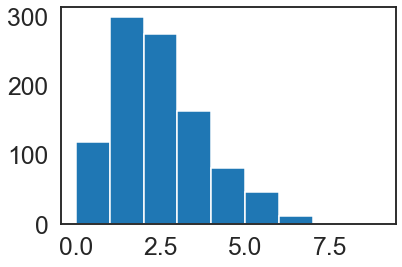

In [2]:
#poisson.rvs(mu, loc, size) - can set loc=0
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson
mu = 2
X = sc.stats.poisson.rvs(mu = mu, size = 1000)
plt.hist(X, bins = np.arange(10))

### Exponential:

pdf $f(x) = \frac{1}{\mu} e^{-x/\mu}$, mean $\mu$, variance $\mu^2$.

(array([0.07185613, 0.02928427, 0.01393261, 0.00748233, 0.00361216,
        0.00167707, 0.00051602, 0.00025801, 0.00025801, 0.00012901]),
 array([1.72065250e-02, 7.76880736e+00, 1.55204082e+01, 2.32720090e+01,
        3.10236099e+01, 3.87752107e+01, 4.65268116e+01, 5.42784124e+01,
        6.20300132e+01, 6.97816141e+01, 7.75332149e+01]),
 <a list of 10 Patch objects>)

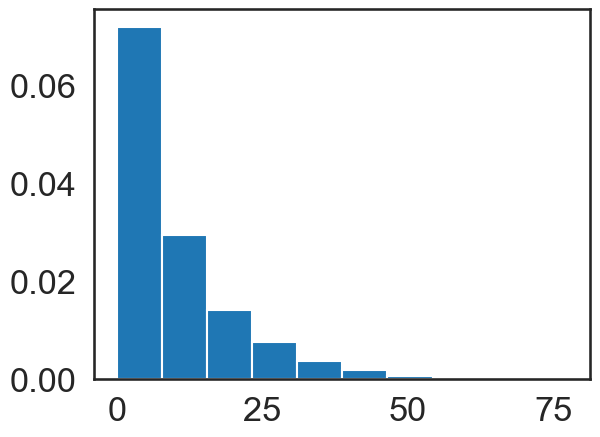

In [11]:
#expon.rvs(loc, scale, size) - can set loc = 0; scale is basically mu
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html#scipy.stats.expon
mu = 10
X = sc.stats.expon.rvs(scale = mu, size = 1000)
plt.hist(X, density=True) 

### Log-normal

$X$ is said to be log-normally distributed with mean $e^{\mu + \frac{\sigma^2}{2}}$ and variance $\left(e^{\sigma^2}-1 \right)e^{2\mu + \sigma^2} $,  if $\ln X$ is normally distributed with mean $\mu$ and variance $\sigma^2$.

The pdf of $X$ is given by $f(x) = \frac{1}{x \sigma \sqrt{2 \pi}} e^{-\frac{(ln \; x - \mu)^2}{2 \sigma^2}}$.

Alternatively, given the mean $m$ and variance $v$ of a log-normal distribution, we can compute $\mu$ and $\sigma$, parameters of the corresponding normal distribution as:
\begin{align*}
\mu &= \ln \left( \frac{m}{\sqrt{1+\frac{v}{m^2}}} \right), \\
\sigma^2 & = \ln \left( 1+ \frac{v}{m^2} \right).
\end{align*}

(array([0.27578549, 0.03172475, 0.00282696, 0.00188464, 0.00031411,
        0.00094232, 0.00031411, 0.        , 0.        , 0.00031411]),
 array([ 0.05646694,  3.24010073,  6.42373452,  9.60736832, 12.79100211,
        15.9746359 , 19.15826969, 22.34190348, 25.52553727, 28.70917107,
        31.89280486]),
 <a list of 10 Patch objects>)

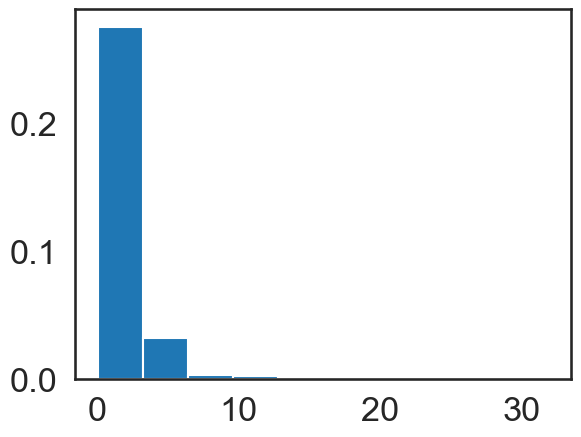

In [16]:
#lognorm.rvs(s, loc, scale, size) - can set loc =0; s is \sigma, scale is e^\mu
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.lognorm.html#scipy.stats.lognorm
mu = 0
sigma = 1
X = sc.stats.lognorm.rvs(s = sigma, loc = 0, scale = np.exp(mu), size = 1000)
plt.hist(X, density=True)
#plt.hist(np.log(X), normed=True)


In [18]:
print(np.mean(np.log(X)))
print(np.var(np.log(X)))


-0.03665479880680145
0.9563150022444261


### Triangular

pdf 
\begin{align*}
f(x) = \cases{
0 &: $x<\alpha$ \\
\frac{2(x-\alpha)}{(\beta-\alpha)(\gamma-\alpha)} &:$ \alpha \leq x \leq \gamma$ \\
\frac{2}{\beta-\alpha} &: $x= \gamma $\\
\frac{2(\beta-x)}{(\beta-\alpha)(\beta-\gamma)} &:$ \gamma \leq x \leq \beta $\\
0 &: $x \geq \beta$
}
\end{align*}
where $\alpha, \beta$ are the minimum and maximum of the support and $\gamma$ is the mode.  




(array([0.06673532, 0.14373761, 0.2566743 , 0.33538775, 0.23956268,
        0.23956268, 0.19165014, 0.11807018, 0.08384694, 0.0359344 ]),
 array([1.0795596 , 1.66395781, 2.24835602, 2.83275423, 3.41715244,
        4.00155064, 4.58594885, 5.17034706, 5.75474527, 6.33914348,
        6.92354169]),
 <a list of 10 Patch objects>)

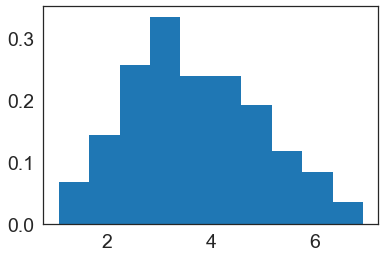

In [5]:
#triang.rvs(c, loc, scale, size)
#The pdf slopes up from loc to loc+c, then down from loc+c to loc+scale.
#So given \alpha, \beta, and \gamma, we have loc = \alpha, loc+scale = \beta, and loc+c*scale = \gamma
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html#scipy.stats.triang
alpha=1
beta=7
gamma=3
#solving above equations
loc = alpha
scale = beta-loc
c = (gamma-loc)/(beta-loc)
X = sc.stats.triang.rvs(c, loc, scale, size=1000)
plt.hist(X, density=True)

# Question 1

Nuts & Bolts Co. makes two types of assembly parts. The diameter of a nut it manufactures ($D_{nut}$) follows a lognormal distribution with mean 6.5mm and standard deviation 1mm. The diameter of a bolt ($D_{bolt}$) follows a triangular distribution with min, max, and most likely values 3, 6, and 5mm, respectively.


## Part a

Use 2,500 replications to estimate the clearance between nut and bolt: $\mathbb{E}[D_{nut}-D_{bolt}]$.  Found a 99% confidence interval for the the estimated clearance.





In [4]:
n = 2500


#Nuts: lognorm.rvs(s, loc, scale, size) - can set loc =0; s is \sigma, scale is e^\mu
#Given mean and variance, use formula above (from Wikipedia) to figure out mu, sigma
m = 6.5
v = 1.0
e_mu = m/np.sqrt(1+(v/m**2))
s = np.sqrt(np.log(1 + v/m**2))
D_nut = sc.stats.lognorm.rvs(s, 0, scale = e_mu, size = n)


#Bolts:  triang.rvs(c_bar, loc, scale, size)
#loc = a, loc+scale = b, and loc+c_bar*scale = c 
alpha=3
beta=6
gamma=5
loc = alpha
scale = beta-loc
c = (gamma-loc)/(beta-loc)
D_bolt = sc.stats.triang.rvs(c, loc, scale, n)


clearance = D_nut - D_bolt


#CI for the estimated clearance
meanClear = np.mean(clearance)
var = np.var(clearance, ddof=1) 
z = sc.stats.norm.ppf(0.995)
LB = meanClear - z*np.sqrt(var/n)
UB = meanClear + z*np.sqrt(var/n)

print("Mean clearance: {}, with 99% CI:  {}".format(meanClear, (LB, UB)))
print("Nut-mean:  {}".format(np.mean(D_nut)))
print("Bolt-mean:  {}".format(np.mean(D_bolt)))
np.mean(D_nut), e_mu, s

Mean clearance: 1.851020043053465, with 99% CI:  (1.7912753728045283, 1.9107647133024015)
Nut-mean:  6.5157324797540666
Bolt-mean:  4.6647124367006025


(6.5157324797540666, 6.4244160347290125, 0.15294730979884993)

## Part b

Use the resulting histogram to estimate the value $d$ such that 
$\mathbb{P}(0<D_{nut}-D_{bolt}\leq d)=0.90$.

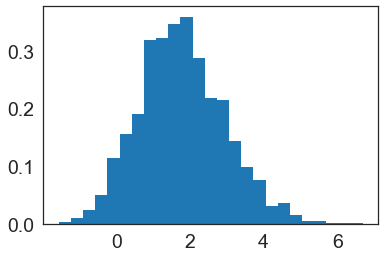

In [7]:
plt.hist(clearance, 25, density=True);

In [8]:
# Find d
sorted_clearance = np.sort(clearance)

#Identify the smallest index where sorted_clearance is >0
index_lower = min(np.where(sorted_clearance > 0)[0])

#We want to capture 90% of the data, so that index_upper - index_lower + 1 = ceil(0.9n)
index_upper = math.ceil(n*0.90) + index_lower -1
index_upper = int(index_upper) #parse back to integer
d = sorted_clearance[index_upper]
print("d = {}".format(d))
  
#Let's check we did this right.  Use indicator variables to identify the bolts that are within range
accept = (clearance >0) & (clearance <=d)
print("acceptable:  {}".format(np.sum(accept)/n))



d = 3.8442642640104188
acceptable:  0.9




---



# Question 2

Suppose  you  are  asked  to  determine  the  registration  fee  for  an  academic  conference.  The number  of  people  who  will  register  for  this  conference  follows  a  Poisson  distribution  with  rate parameter  $\lambda = 250$  (as  long  as  the  registration  fee  is  less  than  600).  

The  cost  of  running the  conference can  be  divided  into  two  parts:  fixed  cost  and  variable  cost.  The  fixed  cost  includes  room rental  ($\$6000$),  speaker  honorarium  ($\$5000$),  meeting  management  ($\$5000$)  and  marketing ($\$7000$).  The  variable  cost  includes  registration  cost  (printing,  name  tag  etc,  which  is  $\$80$ per  person)  as  well  as  food  and  beverage  cost  (which  is  normally  distributed  with  mean $\$100$ per  person  and  variance  100).  Assume  that  a  single  food  and  beverage  cost  is  applied  to all  attendees.  What  is  the  minimum  registration  fee  such  that  the  probability  of  making  a profit  is  at  least  95%?

In [9]:
fixed_costs = 6000 + 5000 + 5000 + 7000
nr = 1000 # number of replications (repeated nr times for each possible registration fee)

# For every registration price, generate 1000 replications of the number of attendees and the food costs
prob_pos_profit = np.empty(600)
for j in range(600):
    register_fee = j
    X = sc.stats.poisson.rvs(250,size=nr)
    #if (j==0): print(X)
    variable_costs = 80*X + sc.stats.norm.rvs(loc= 100, scale = 10, size=nr)*X  # In Python, vector*vector is componentwise!
    #if (j == 0): print(X*sc.stats.norm.rvs(loc= 100, scale = 10, size=nr))
    profit = X*register_fee - variable_costs - fixed_costs
    
    prob_pos_profit[j] = np.mean(profit > 0)

Text(0,0.5,'Probability of Profit')

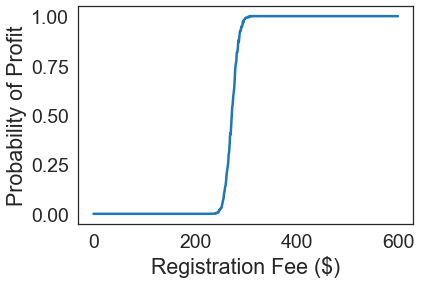

In [10]:
plt.plot(range(600),prob_pos_profit);
plt.xlabel("Registration Fee ($)")
plt.ylabel("Probability of Profit")

In [11]:
# Find the first index where prob_pos_profit > 95%
print("Min Fee: ${}".format(np.min(np.where(prob_pos_profit>.95)[0])))


Min Fee: $293




---



# Question 3
First: Review of LCG

Given the LCG $X_{n+1}=  (a X_n+c)  \mod m$,  with $m=  1000,a=  31,c=  3$, we want to generate  samples  of (pseudo-)random  numbers:

### Part a ###
Generate  512  uniform  random  numbers  (U1,  .  .  .  ,  U512)  with  this  LCG,  starting  with  the seed $x_0=  0$.  Plot  the  points  (U1,  U2),(U3,  U4),  .  .  .  ,(U511,  U512)

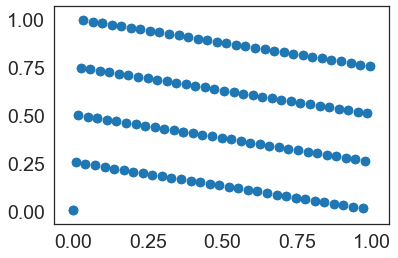

In [12]:
a = 31
c = 3
m = 1000

n = 512
X = np.empty(n)
X[0] = 0
for i in range(1,n):
    X[i] = np.mod(a*X[i-1]+c,m)
    
U = (X+1.0)/(m+1)  # Use the convention U_1 = (X_0+1)/(m+1), etc.

plt.scatter(U[0:n-1:2], U[1:n:2]);



### Part b ###
Suppose  that  we  wish  to  estimate  the  probability  that  $U \sim Unif(0,1)$ takes value greater than 0.7.  The  true  probability  is $0.3$, but what happens if we estimate this probability by generating our pseudo-random variables via our LCG?   

Use  this  LCG  to  generate  a sequence  of  pseudo-random numbers on $Unif(0,  1)$ starting  with  the seed $x_0=  0$.  If you ran this non-full period LCG for a very long time, what is the limit of the estimate of $\mathbb{P}[U > 0.7]$,  obtained  from  the  $n$ pseudo-random numbers as $n\rightarrow \infty$? 

In [13]:
# First find the period of the LCG with these parameters
print(np.where(X==0)[0])

[  0 250 500]


Find when the LCG loops back to the seed.  The period is 250, so rather than consider $n \to \infty$, we can just consider the first 250 pseudo-random numbers.

In [14]:
# Count how many are > 0.7
U = U[0:250]
count_7 = sum(U>.7)
print(count_7)
print(count_7/250)


74
0.296


74 of the numbers in the period of 250 will count towards the probability estimate (those satifsying $U > 0.7$). Therefore $74/250 = 0.296$ is the limiting probability estimate.



---



# Question 4


As we discussed in class, in order to avoid biases, simulations should not use anywhere near the full period of an LCG. This creates a problem for some large simulations, which need a lot of random variables. For example, a common LCG implementation uses $m = 2^{31} − 1$, which is insufficient for traffic simulators with tens of thousands of vehicles, thousands of random disturbances and lots of replications. We will now see a method to combine multiple LCGs to obtain a generator with a longer
period. The main idea for increasing the period of an LCG is to add a smaller period LCG to it. For example, suppose we have two MGs, $X_{n+1} = (a_1 X_n ) \text{ mod } m_1$ and $Y_{n+1} = (a_2 Y_n ) \text{ mod } m_2$ , with $m_1 > m_2$. We can derive a combined generator by setting $Z_n = (X_n + Y_n ) \text{ mod } m_1$ . If properly designed, the resulting period can be on the order of $m_1 m_2$. We will now see a small example to see how this works.

#### Part a

Consider two LCGs, $x_{n+1} = (5x_n ) \text{ mod } 16$ and $y_{n+1} = (2x_n ) \text{ mod } 7$. Starting both with seed $x_0 = y_0 = 1$, plot the sequences $x_n ,y_n$ using the clock visualization introduced in class (one separate plot for each sequence). You can use the code in ${\tt clockpath.ipynb}$ (feel free to modify it if required) or write your own visualization.

What is the period of each sequence?


In [1]:
# Functions to visualize LCG sequence on clock
def plot_clock_face(m,fig,annotate = False):
    # Plot the m points on the unit circle
    for i in range(m):
        theta = 2.0*np.pi*i/m
        plt.plot(np.sin(theta),np.cos(theta),'rs')
        if annotate:
            plt.annotate(str(i), (np.pi/2-theta,1.05),xycoords='polar')


def plot_clock_path(m,u,fig,color = 'b'):
    # Plot the seed node
    theta_0 = 2.0*np.pi*(u[0]*(m+1)-1)/m
    plt.plot(np.sin(theta_0),np.cos(theta_0),'gs')
    
    # Plot the path of the LCG sequence
    for i in range(len(u)-1):
        theta_start = 2.0*np.pi*(u[i]*(m+1)-1)/m
        theta_end = 2.0*np.pi*(u[i+1]*(m+1)-1)/m
        x_start = np.sin(theta_start)
        y_start = np.cos(theta_start)
        del_x = np.sin(theta_end) - np.sin(theta_start)
        del_y = np.cos(theta_end) - np.cos(theta_start)
        if abs(del_x)>0 or abs(del_y)>0:
            plt.arrow(x_start,y_start,del_x,del_y, 
                      length_includes_head = True, head_width=0.05, head_length=0.1, fc=color, ec=color)

In [2]:
# Function to generate pseudorandom sequence using LCG
# Setting default parameters to glibc specifications (without truncation)

def LCG(n,m = 2**31-1,a = 1103515245,c = 12345,x_0 = 1):
    u = np.zeros(n)
    x_n = np.zeros(n)
    
    x = x_0
    # x_n+1 = (ax_n+c) mod m
    for i in range(n):
        x_n[i] = x
        u[i] = (x+1.0)/(m+1.0) # normalize to be in [0,m/m+1]
        x = (a*x+c)%m

    return u, x_n

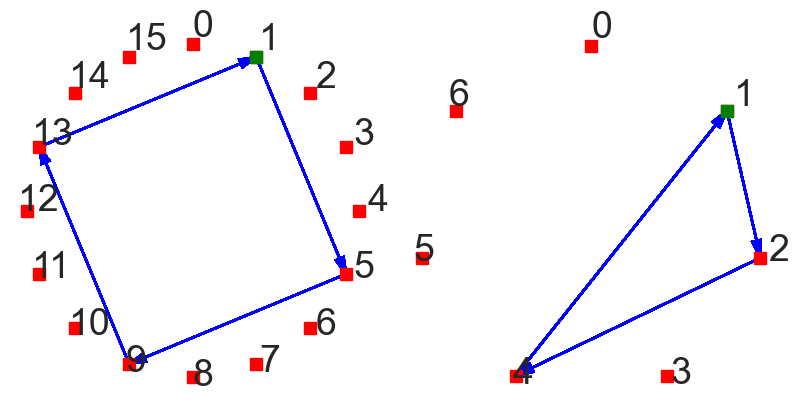

In [5]:
import matplotlib.gridspec as gridspec

x_0 = 1

fig = plt.figure()
fig.set_size_inches(w=15,h=15)

gridspec.GridSpec(6,6)
fig = plt.subplot2grid((6,6), (0,0), colspan=2, rowspan=2)
m_1 = 16
a_1 = 5
c_1 = 0
u, x = LCG(n = m_1**2 + 1, m = m_1, a = a_1, c = c_1, x_0 = x_0)
plot_clock_face(m_1,fig,annotate = True)
plot_clock_path(m_1,u,fig)
plt.axis('equal')
plt.axis('off')

fig = plt.subplot2grid((6,6), (0,2), colspan=2, rowspan=2)
m_2 = 7
a_2 = 2
c_2 = 0
v, y = LCG(n = m_1**2 + 1, m = m_2, a = a_2, c = c_2, x_0 = x_0)
plot_clock_face(m_2,fig,annotate = True)
plot_clock_path(m_2,v,fig)
plt.axis('equal')
plt.axis('off')

plt.show()

Observe that the first LCG has period 4, and the second LCG has period 3

#### Part b 
Next, define a combined LCG as $z_{n} = (x_n +y_n ) \mod 16$. Starting both the base LCGs with seed $x_0 = y_0 = 1$, plot the sequence $z_n$ using the clock visualization.

What is the period of this new sequence?

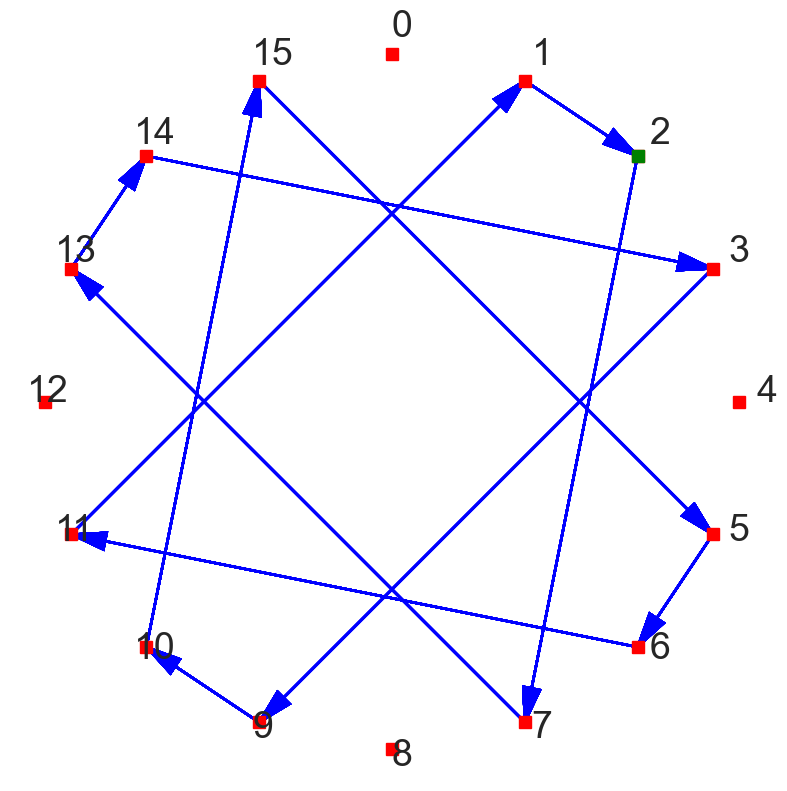

In [6]:
fig = plt.figure()
fig.set_size_inches(w=15,h=15)

fig = plt.subplot2grid((6,6), (2,0), colspan=4, rowspan=4)

m_3 = 16
z = (x+y)%m_3
w = (z+1.0)/(m_3+1.0) # normalize z

plot_clock_face(m_3,fig,annotate = True)
plot_clock_path(m_3,w,fig)
plt.axis('equal')
plt.axis('off');

Observe that this sequence has a much better period of $12$